<a href="https://colab.research.google.com/github/shubhamByte/Lab_Assignment_3/blob/main/B20AI039_q1_Lab_assignment_3_dv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
df = pd.read_csv('/content/capitals.csv')

### Total 32 capitals (union territories included)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        32 non-null     object 
 1   Latitude    32 non-null     float64
 2   Longitude   32 non-null     float64
 3   iso2        32 non-null     object 
 4   population  32 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ KB


In [5]:
df.tail()

,city,Latitude,Longitude,iso2,population
27,Kohima,25.6667,94.1194,IN,99039
28,Itanagar,27.1000,93.6200,IN,59490
29,Panaji,15.4800,73.8300,IN,40017
30,Daman,20.4170,72.8500,IN,39737
31,Kavaratti,10.5626,72.6369,IN,10688


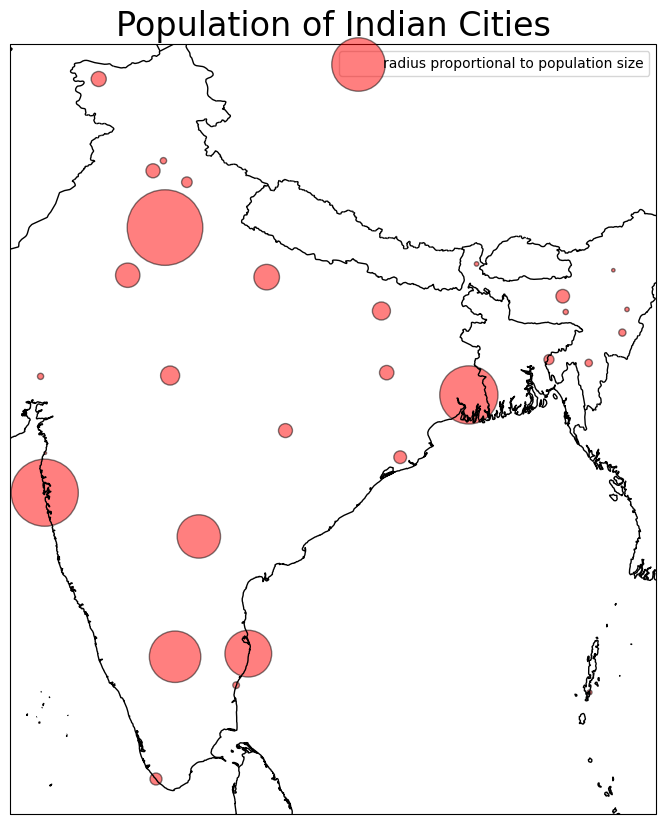

In [10]:
# Create a GeoDataFrame with the city names, population, and coordinates
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Define the map projection
crs = ccrs.PlateCarree()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': crs})

# Add the India map as a background
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=1)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1)

# Plot the bubbles using the population as the size
gdf.plot(ax=ax, color='red', markersize=df['population']*0.0001, alpha=0.5, edgecolor='k', label = 'radius proportional to population size')

# Set the title and axis labels
ax.set_title('Population of Indian Cities', fontsize=24)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)

plt.legend()
# Show the map
plt.show()
